In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes_prediction_dataset.csv')

In [2]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Data Summary

In [3]:
df.shape

(100000, 9)

In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
#To describe the numeric columns in the data
numeric_variables = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Use describe() function on the selected numeric variables
df[numeric_variables].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [6]:
# To select the categorical variables from others
categorical_columns = ['gender','hypertension', 'heart_disease', 'smoking_history', 'diabetes']
for column in categorical_columns:
    # Count the occurrences of each unique value in the column
    value_counts = df[column].value_counts()
    
    # Print the value counts for the column
    print("Value counts for the column '{}'".format(column))
    print(value_counts)

Value counts for the column 'gender'
Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
Value counts for the column 'hypertension'
0    92515
1     7485
Name: hypertension, dtype: int64
Value counts for the column 'heart_disease'
0    96058
1     3942
Name: heart_disease, dtype: int64
Value counts for the column 'smoking_history'
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64
Value counts for the column 'diabetes'
0    91500
1     8500
Name: diabetes, dtype: int64


# Data Preprocessing

In [7]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
duplicate_rows = df[df.duplicated()]

# Print duplicated rows
print("Duplicated Rows:")
print(duplicate_rows)

# Remove duplicated rows
df = df.drop_duplicates()

Duplicated Rows:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6            

In [10]:
print(df.shape)

(96146, 9)


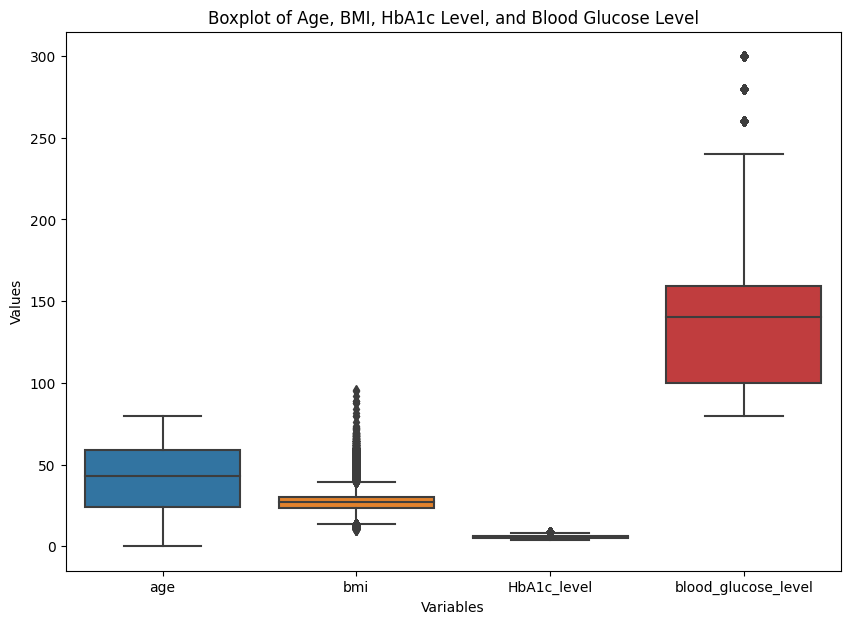

In [11]:
# checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns

# checking for outliers
outliers = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
# Creating boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(data=outliers)
plt.title('Boxplot of Age, BMI, HbA1c Level, and Blood Glucose Level')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

In [12]:
# Checking the number of outliers in bmi
# Calculate the first quartile (Q1)
Q1 = np.percentile(df['bmi'], 25)

# Calculate the third quartile (Q3)
Q3 = np.percentile(df['bmi'], 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
num_outliers = np.sum((df['bmi'] < lower_bound) | (df['bmi'] > upper_bound))

print("Number of outliers in BMI variable:", num_outliers)

Number of outliers in BMI variable: 5354


In [13]:
import pandas as pd

# Assuming df is your DataFrame and columns_to_check are the columns you want to check for outliers
# Define a function to remove outliers using IQR
def remove_outliers(df, columns_to_check):
    for column in columns_to_check:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Call the function to remove outliers
columns_to_check = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']  # Adjust based on your DataFrame
df = remove_outliers(df, columns_to_check)

# Print info after removing outliers
print("Info after removing outliers:")
print(df.info())
print(df.shape)

Info after removing outliers:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 88195 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               88195 non-null  object 
 1   age                  88195 non-null  float64
 2   hypertension         88195 non-null  int64  
 3   heart_disease        88195 non-null  int64  
 4   smoking_history      88195 non-null  object 
 5   bmi                  88195 non-null  float64
 6   HbA1c_level          88195 non-null  float64
 7   blood_glucose_level  88195 non-null  int64  
 8   diabetes             88195 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.7+ MB
None
(88195, 9)


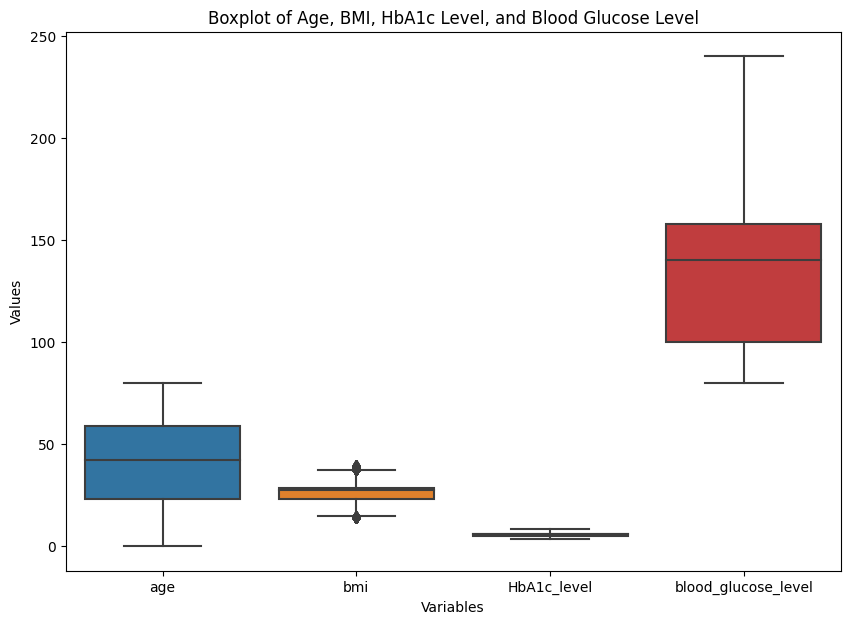

In [14]:
# checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns

# checking for outliers
outliers = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
# Creating boxplot with labels
plt.figure(figsize=(10, 7))
sns.boxplot(data=outliers)
plt.title('Boxplot of Age, BMI, HbA1c Level, and Blood Glucose Level')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

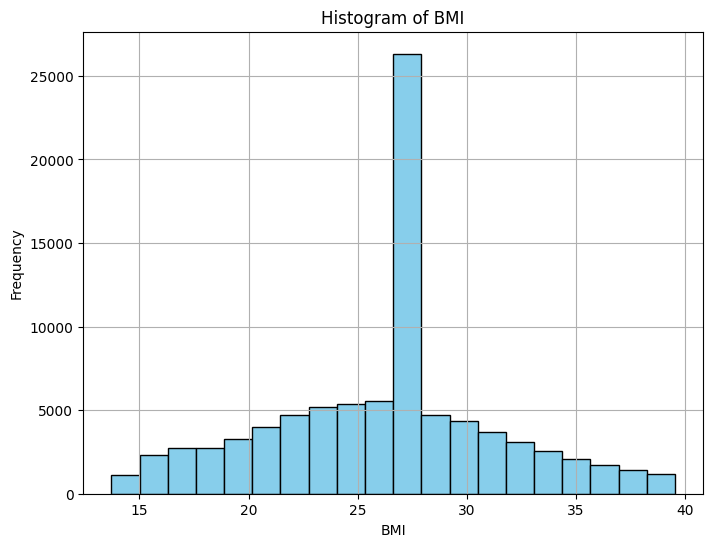

In [15]:
# Create a histogram of the BMI data
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(df['bmi'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column is categorical
        df[column] = label_encoder.fit_transform(df[column])

In [17]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [18]:
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']

In [19]:
from sklearn.model_selection import train_test_split

# First, split into train+validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70556, 8), (70556,), (17639, 8), (17639,))

In [21]:
y_train.value_counts()

0    66858
1     3698
Name: diabetes, dtype: int64

In [22]:
# Balancing the response variable
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(X_train, y_train)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [23]:
oversampled["diabetes"].value_counts()

0    66858
1    66858
Name: diabetes, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
scaled_features = scaler.fit_transform(oversampled_X)

# Apply the same transformation to the validation and test sets
# scaled_vfeatures = scaler.transform(X_validation)
scaled_tfeatures = scaler.transform(X_test)

# Convert scaled_features back to DataFrame
X_train_scaled = pd.DataFrame(scaled_features, columns=X.columns)
# X_validation_scaled = pd.DataFrame(scaled_vfeatures, columns=X.columns)
X_test_scaled = pd.DataFrame(scaled_tfeatures, columns=X.columns)

scaled_df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(scaled_features)], axis=1)

In [25]:
X_train_scaled.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1.349758,-1.318292,-0.283984,-0.195304,-0.778016,-0.104339,-0.980582,0.195367
1,1.349758,-0.815564,-0.283984,-0.195304,0.370817,0.370169,-0.980582,1.249795
2,-0.740051,-0.632754,-0.283984,5.120232,-1.352432,-0.104339,-0.180149,0.245578
3,-0.740051,-1.455399,-0.283984,-0.195304,-1.352432,-1.934024,-0.180149,0.220472
4,1.349758,0.235593,-0.283984,-0.195304,-1.352432,-0.104339,-2.481393,-0.131004


In [26]:
scaled_df.head()

,diabetes,0,1,2,3,4,5,6,7
0,0,1.349758,-1.318292,-0.283984,-0.195304,-0.778016,-0.104339,-0.980582,0.195367
1,0,1.349758,-0.815564,-0.283984,-0.195304,0.370817,0.370169,-0.980582,1.249795
2,0,-0.740051,-0.632754,-0.283984,5.120232,-1.352432,-0.104339,-0.180149,0.245578
3,0,-0.740051,-1.455399,-0.283984,-0.195304,-1.352432,-1.934024,-0.180149,0.220472
4,0,1.349758,0.235593,-0.283984,-0.195304,-1.352432,-0.104339,-2.481393,-0.131004


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

scoring = ['accuracy','precision', 'recall', 'f1', "roc_auc"]

params = {
    'bootstrap': True, 
    'ccp_alpha': 0.0, 
    'class_weight': None,
    'criterion': 'gini', 
    'max_depth': None, 
    'max_features': 'sqrt',
    'max_leaf_nodes': None, 
    'max_samples': None,
    'min_impurity_decrease': 0.0, 
    'min_samples_leaf': 1,
    'min_samples_split': 2, 
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 100, 
    'n_jobs': -1, 
    'oob_score': False,
    'random_state': 1646, 
    'verbose': 0, 
    'warm_start': False
}

# Create an Random forest classifier
rf_clf = RandomForestClassifier(**params) 

# Perform cross-validation with RFC
rf_clf_score = cross_validate(rf_clf, X=X_train_scaled, y=oversampled_Y, cv=10, scoring=scoring, return_train_score=True)
print(rf_clf_score)

# Compute the mean scores
mean_scores = {metric: np.mean(rf_clf_score[f'test_{metric}']) for metric in scoring}

print("Mean Scores:")
for metric, score in mean_scores.items():
    print(f"{metric}: {score:.4f}")

{'fit_time': array([5.5174849 , 6.05341434, 7.41888237, 7.82372832, 7.99175262,
       7.26943803, 7.42355824, 6.05465722, 6.08363557, 6.63338733]), 'score_time': array([0.36061239, 0.45504546, 0.50619245, 0.5041151 , 0.58880568,
       0.48907161, 0.50140762, 0.36093521, 0.48651767, 0.48629689]), 'test_accuracy': array([0.90996111, 0.98175292, 0.98145378, 0.98160335, 0.98407119,
       0.9827251 , 0.98549099, 0.98257423, 0.98107845, 0.98257423]), 'train_accuracy': array([0.99995845, 0.9995596 , 0.99955129, 0.99958452, 0.99957621,
       0.99954298, 0.99956791, 0.99957622, 0.99956791, 0.9995596 ]), 'test_precision': array([0.9773598 , 0.97131987, 0.97240974, 0.97269524, 0.9751872 ,
       0.97400499, 0.97791194, 0.97315928, 0.9703173 , 0.97302448]), 'train_precision': array([0.99991691, 0.99963433, 0.99951808, 0.99955132, 0.99956791,
       0.99965093, 0.99958452, 0.99961774, 0.99963433, 0.99966755]), 'test_recall': array([0.83936584, 0.99282082, 0.99102602, 0.99102602, 0.99341908,
   

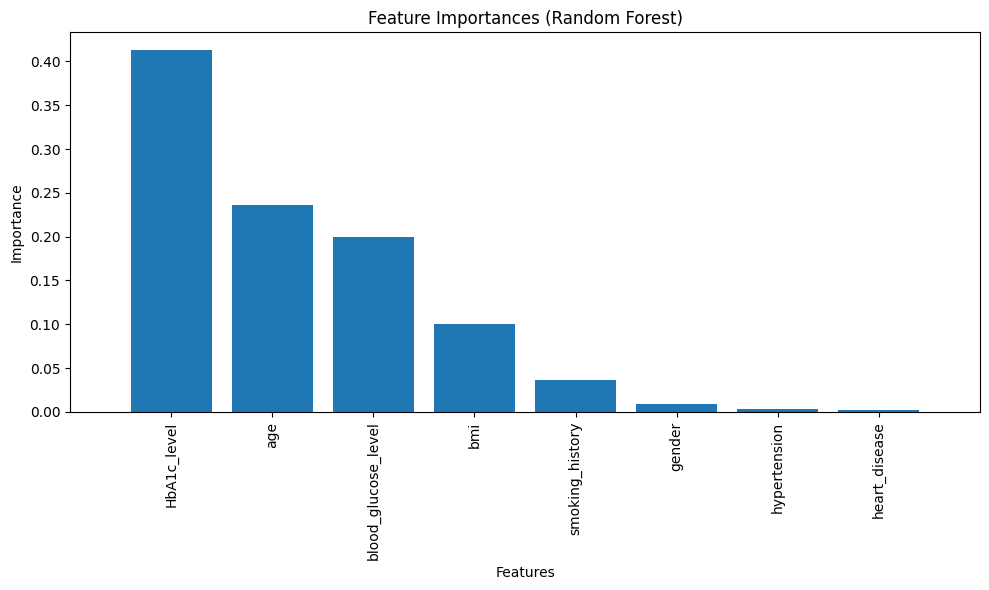

In [28]:
import matplotlib.pyplot as plt

# Fit the Random Forest classifier to the training data
rf_clf.fit(X_train_scaled, oversampled_Y)

# Get feature importances
importances = rf_clf.feature_importances_

# Get feature names
feature_names = X_train_scaled.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

scoring = ['accuracy','precision', 'recall', 'f1', "roc_auc"]

params ={'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 8448,
 'verbose': 0,
 'warm_start': False}
# Create an Extra Trees classifier
extra_trees_model = ExtraTreesClassifier(**params) 

# Perform cross-validation with Extra Trees classifier
extra_trees_score = cross_validate(extra_trees_model, X=X_train_scaled, y=oversampled_Y, cv=10, scoring=scoring, return_train_score=True)
print(extra_trees_score)

# Compute the mean scores
mean_scores = {metric: np.mean(extra_trees_score[f'test_{metric}']) for metric in scoring}

print("Mean Scores:")
for metric, score in mean_scores.items():
    print(f"{metric}: {score:.4f}")

{'fit_time': array([4.6644609 , 4.98679137, 4.62610936, 4.43813348, 4.87749267,
       5.00357914, 5.52106953, 4.97723699, 4.97132158, 5.39663911]), 'score_time': array([0.48885965, 0.5014081 , 0.50193048, 0.48578453, 0.46816325,
       0.59609509, 0.50144005, 0.48634672, 0.48581386, 0.48633933]), 'test_accuracy': array([0.93463955, 0.97629375, 0.97397547, 0.9742746 , 0.97464852,
       0.97390069, 0.97831127, 0.97472141, 0.97240296, 0.9747962 ]), 'train_accuracy': array([0.99995845, 0.9995596 , 0.99955129, 0.99958452, 0.99957621,
       0.99954298, 0.99956791, 0.99957622, 0.99956791, 0.9995596 ]), 'test_precision': array([0.96229717, 0.96225867, 0.96020912, 0.96157205, 0.96052823,
       0.96248723, 0.96767588, 0.96133159, 0.95715733, 0.96336301]), 'train_precision': array([0.99991691, 0.99988359, 0.99990022, 0.99990022, 0.99990022,
       0.99990021, 0.9998836 , 0.9998836 , 0.99990022, 0.99990022]), 'test_recall': array([0.90472629, 0.99147472, 0.9889321 , 0.9880347 , 0.98997906,
   

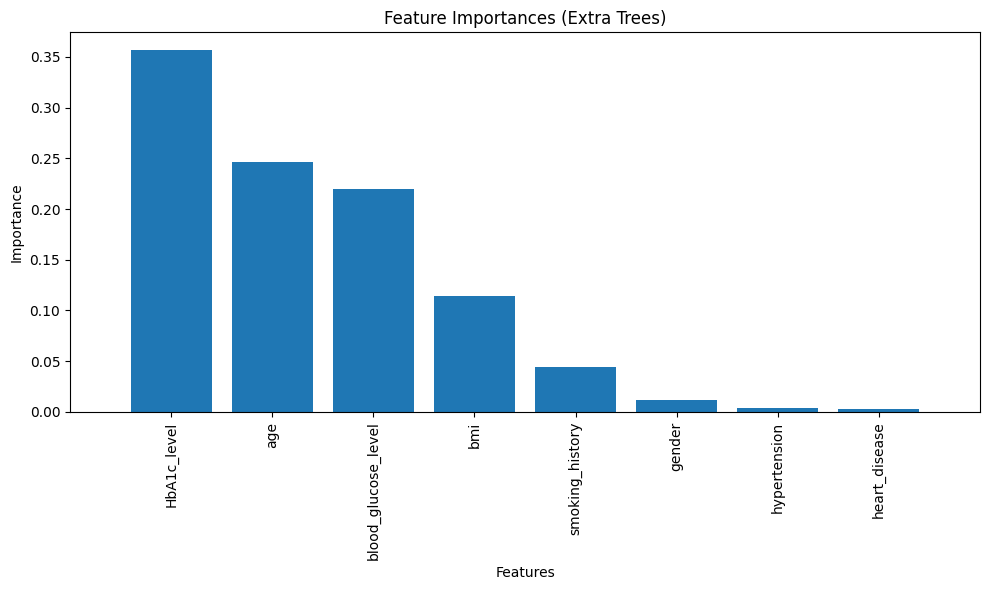

In [30]:
import matplotlib.pyplot as plt

# Fit the Extra Trees classifier to the training data
extra_trees_model.fit(X_train_scaled, oversampled_Y)

# Get feature importances
importances = extra_trees_model.feature_importances_

# Get feature names
feature_names = X_train_scaled.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Extra Trees)")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [31]:
import lightgbm as lgb
# Create a LightGBM classifier
params = {'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 8057,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}
lgb_model = lgb.LGBMClassifier(**params)
lgb_score = cross_validate(lgb_model, X=X_train_scaled, y=oversampled_Y, cv=10, scoring=scoring,return_train_score=True)
print(lgb_score)

# Compute the mean scores
mean_scores = {metric: np.mean(lgb_score[f'test_{metric}']) for metric in scoring}

print("Mean Scores:")
for metric, score in mean_scores.items():
    print(f"{metric}: {score:.4f}")

[LightGBM] [Info] Number of positive: 60172, number of negative: 60172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 120344, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 60172, number of negative: 60172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 120344, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 60172, number of negative: 60172
[LightGBM] [Info] Auto-choosing col-wise multi-thread

[LightGBM] [Info] Number of positive: 66858, number of negative: 66858
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 133716, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


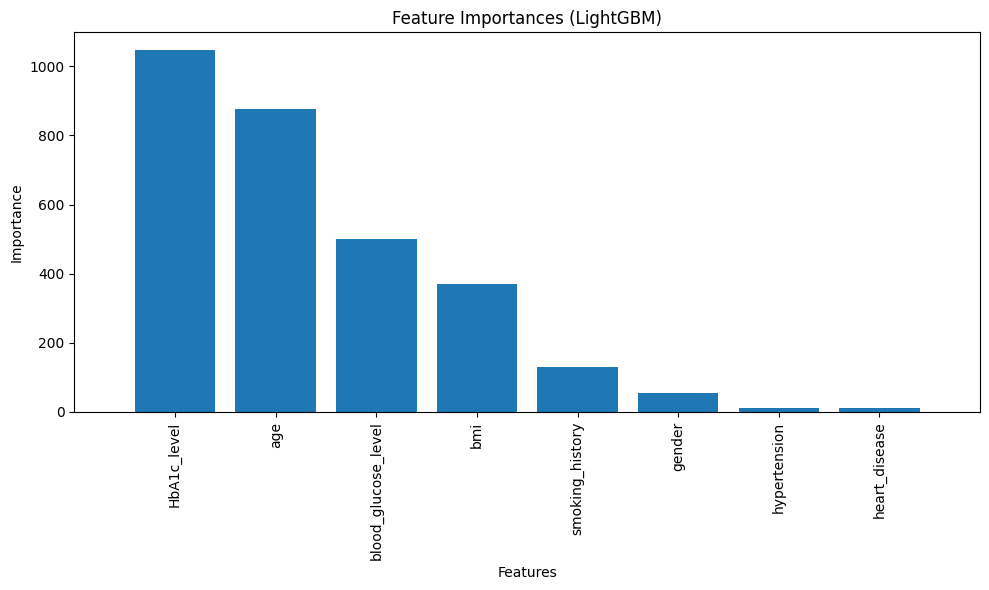

In [32]:
# Fit the LightGBM classifier to the training data
lgb_model.fit(X_train_scaled, oversampled_Y)

# Get feature importances
importances = lgb_model.feature_importances_

# Get feature names
feature_names = X_train_scaled.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (LightGBM)")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
params = {'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8057,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
lg_model = LogisticRegression(**params)
lg_score = cross_validate(lg_model, X=X_train_scaled, y=oversampled_Y, cv=10, scoring=scoring,return_train_score=False)
print(lg_score)
# Compute the mean scores
mean_scores = {metric: np.mean(lg_score[f'test_{metric}']) for metric in scoring}

print("Mean Scores:")
for metric, score in mean_scores.items():
    print(f"{metric}: {score:.4f}")

{'fit_time': array([0.17493939, 0.18703914, 0.22154093, 0.15664601, 0.15203643,
       0.12539792, 0.12175179, 0.14100099, 0.15653729, 0.14142466]), 'score_time': array([0.04362011, 0.0468626 , 0.02964354, 0.0316577 , 0.03163743,
       0.03240395, 0.01912999, 0.03126383, 0.03124332, 0.03125   ]), 'test_accuracy': array([0.84938678, 0.86516602, 0.86329644, 0.86621298, 0.86598863,
       0.86740951, 0.8693441 , 0.86979284, 0.86590382, 0.86388453]), 'test_precision': array([0.84844869, 0.84933467, 0.84979839, 0.84864018, 0.85107604,
       0.85168218, 0.8536236 , 0.85537665, 0.84885213, 0.85466472]), 'test_recall': array([0.85073287, 0.88782531, 0.88259049, 0.8914149 , 0.88722704,
       0.88976967, 0.89154824, 0.89005236, 0.89036793, 0.87690697]), 'test_f1': array([0.84958925, 0.86815356, 0.86588408, 0.86950179, 0.86877563,
       0.87030941, 0.87217385, 0.87237006, 0.86911453, 0.86564299]), 'test_roc_auc': array([0.93328432, 0.94471735, 0.94077663, 0.94289792, 0.94367021,
       0.9444

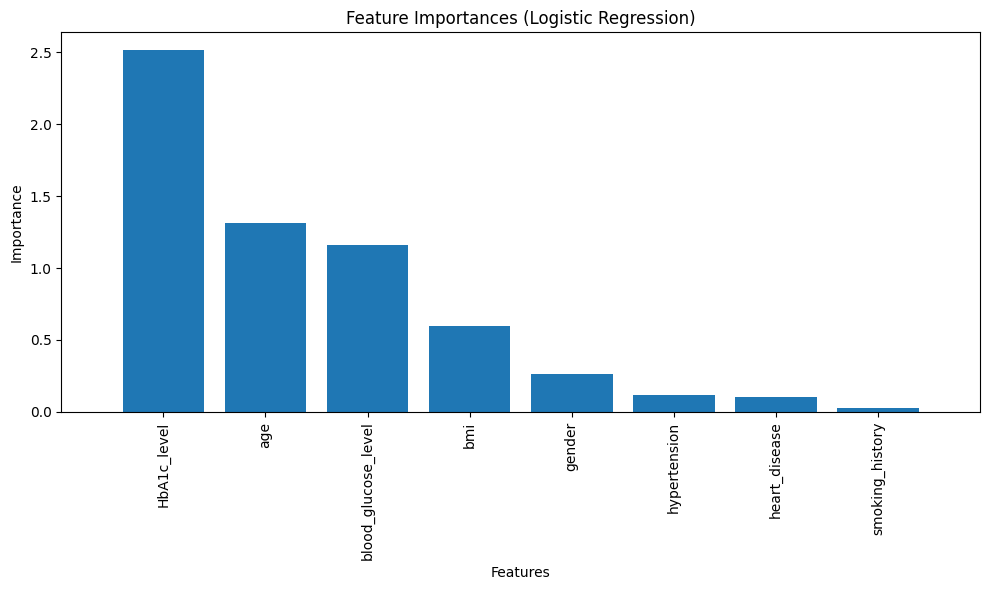

In [34]:
# Fit the Logistic Regression model to the training data
lg_model.fit(X_train_scaled, oversampled_Y)

# Get feature importances
importances = np.abs(lg_model.coef_[0])

# Get feature names
feature_names = X_train_scaled.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Logistic Regression)")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [35]:
# For Logistic Regression
lg_model.fit(X_train_scaled, oversampled_Y)
y_pred_logistic = lg_model.predict(X_test_scaled)

# For Random Forest
rf_clf.fit(X_train_scaled, oversampled_Y)
y_pred_rf = rf_clf.predict(X_test_scaled)

# For Extra Trees
extra_trees_model.fit(X_train_scaled, oversampled_Y)
y_pred_extra_trees = extra_trees_model.predict(X_test_scaled)

# For LightGBM
lgb_model.fit(X_train_scaled, oversampled_Y)
y_pred_lgb = lgb_model.predict(X_test_scaled)

[LightGBM] [Info] Number of positive: 66858, number of negative: 66858
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 133716, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    labels = ["No Diabetes", "Diabetes"]  # Define custom labels
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Confusion Matrix of Random Forest:
[[16320   399]
 [  400   520]]


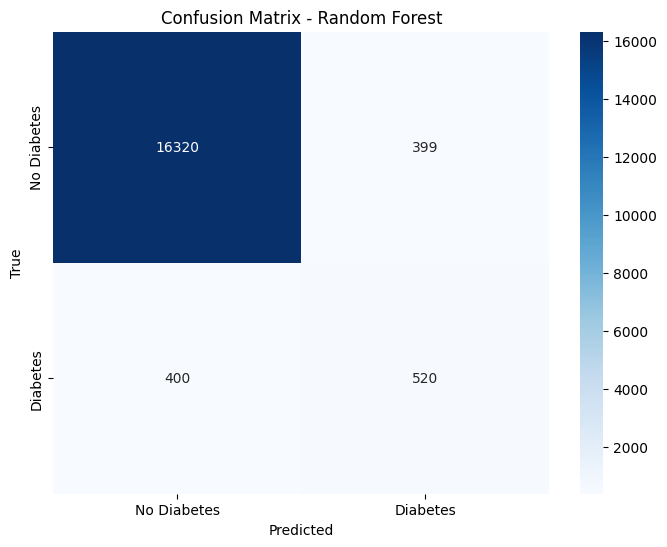

In [37]:
#RFC
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix of Random Forest:")
print(conf_matrix)
plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix - Random Forest')


Confusion Matrix of Extra trees:
[[16135   584]
 [  379   541]]


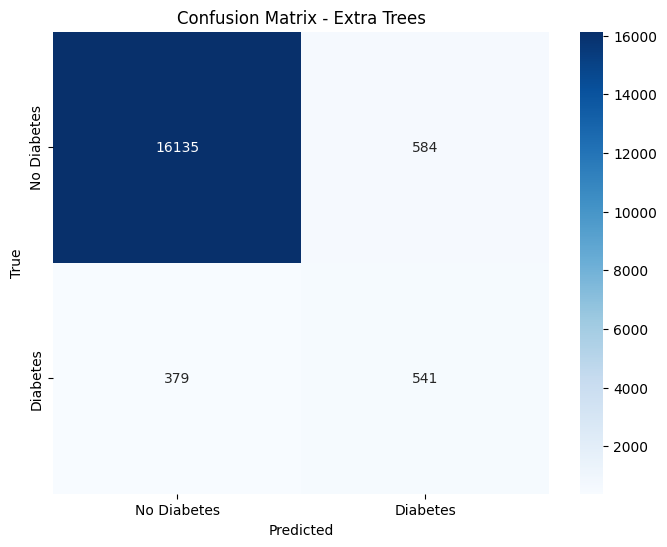

In [38]:
#Extra Trees
conf_matrix = confusion_matrix(y_test, y_pred_extra_trees)

print("Confusion Matrix of Extra trees:")
print(conf_matrix)
plot_confusion_matrix(y_test, y_pred_extra_trees, 'Confusion Matrix - Extra Trees')

Confusion Matrix of Light gradient boosting:
[[16497   222]
 [  423   497]]


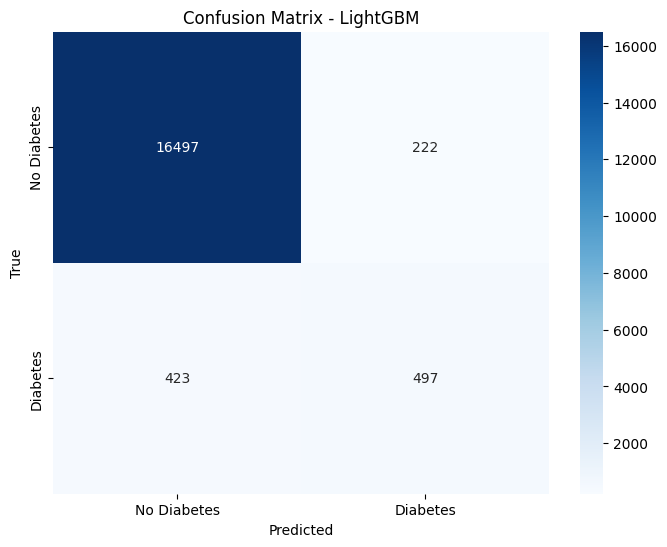

In [39]:
#Light gradient boosting
conf_matrix = confusion_matrix(y_test, y_pred_lgb)

print("Confusion Matrix of Light gradient boosting:")
print(conf_matrix)
plot_confusion_matrix(y_test, y_pred_lgb, 'Confusion Matrix - LightGBM')

Confusion Matrix of Logistic Regression:
[[14140  2579]
 [  160   760]]


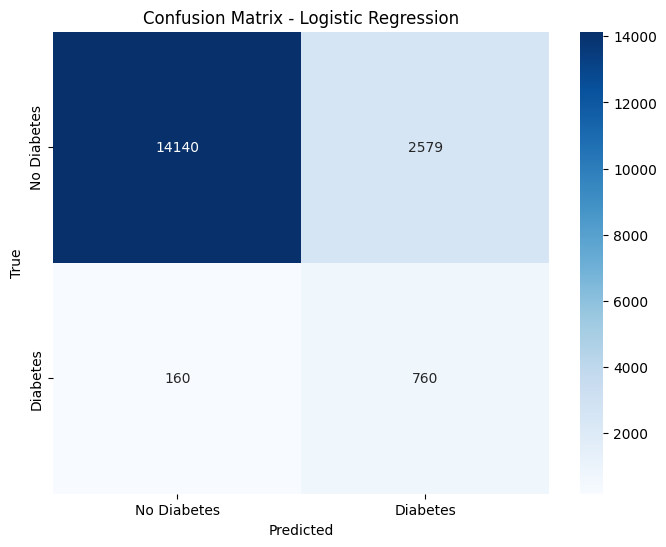

In [40]:
# Logistic regression
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

print("Confusion Matrix of Logistic Regression:")
print(conf_matrix)
plot_confusion_matrix(y_test, y_pred_logistic, 'Confusion Matrix - Logistic Regression')

In [41]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble classifier
ensemble_clf_rf_et = VotingClassifier(estimators=[('rf', rf_clf), ('et', extra_trees_model)], voting='soft')

# Fit the ensemble classifier
ensemble_clf_rf_et.fit(X_train_scaled, oversampled_Y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_features='sqrt',
                                                     n_jobs=-1,
                                                     random_state=1646)),
                             ('et',
                              ExtraTreesClassifier(max_features='sqrt',
                                                   n_jobs=-1,
                                                   random_state=8448))],
                 voting='soft')

In [42]:
# Define the scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform cross-validation with the ensemble classifier
ensemble_clf_rf_et_score = cross_validate(ensemble_clf_rf_et, X=X_train_scaled, y=oversampled_Y, cv=10, scoring=scoring, return_train_score=False)
print(ensemble_clf_rf_et_score)

# Compute the mean scores
mean_scores = {metric: np.mean(ensemble_clf_rf_et_score[f'test_{metric}']) for metric in scoring}

print("Mean Scores:")
for metric, score in mean_scores.items():
    print(f"{metric}: {score:.4f}")

{'fit_time': array([10.26913786, 11.30719185, 10.65688825, 10.97629166, 10.97883201,
       10.3761127 , 11.5428834 , 11.73247409, 13.18220377, 11.82717443]), 'score_time': array([0.90978456, 0.95665574, 0.83166957, 0.80001807, 0.92535615,
       0.79950166, 0.96469879, 1.09777308, 0.92583013, 0.94144416]), 'test_accuracy': array([0.92521687, 0.98078074, 0.97950942, 0.98040682, 0.98070595,
       0.98130422, 0.9847431 , 0.98018099, 0.97913395, 0.98100366]), 'test_precision': array([0.97225914, 0.96838117, 0.96830266, 0.96986542, 0.96919708,
       0.97060544, 0.97661421, 0.96902396, 0.96691444, 0.97113976]), 'test_recall': array([0.87541131, 0.99401735, 0.99147472, 0.99162429, 0.99297039,
       0.99267125, 0.99326851, 0.9920718 , 0.99222255, 0.99147472]), 'test_f1': array([0.92129703, 0.98103181, 0.9797517 , 0.98062417, 0.98093972,
       0.98151434, 0.98487096, 0.98041245, 0.97940503, 0.98120189]), 'test_roc_auc': array([0.98706978, 0.99887886, 0.99855674, 0.99872998, 0.99893529,
   

Confusion Matrix of RF and et:
[[16264   455]
 [  389   531]]


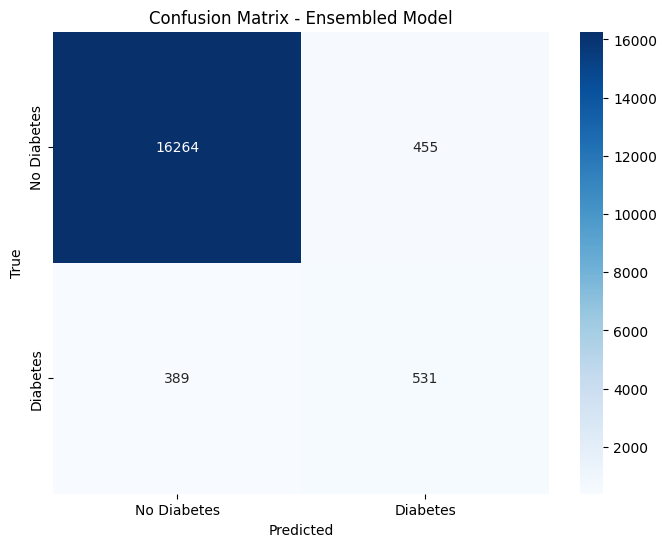

In [43]:
# Ensembled
y_pred_ensemble_rf_et = ensemble_clf_rf_et.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred_ensemble_rf_et)

print("Confusion Matrix of RF and et:")
print(conf_matrix)
plot_confusion_matrix(y_test, y_pred_ensemble_rf_et, 'Confusion Matrix - Ensembled Model')

In [47]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [48]:
# List of feature names
selected_features = ['age', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level']

# Subset your dataset using the selected feature names
X_train_scaled = X_train_scaled[selected_features]

X_test_scaled = X_test_scaled[selected_features]

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

scoring = ['accuracy','precision', 'recall', 'f1', "roc_auc"]

params = {
    'bootstrap': True, 
    'ccp_alpha': 0.0, 
    'class_weight': None,
    'criterion': 'gini', 
    'max_depth': None, 
    'max_features': 'sqrt',
    'max_leaf_nodes': None, 
    'max_samples': None,
    'min_impurity_decrease': 0.0, 
    'min_samples_leaf': 1,
    'min_samples_split': 2, 
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 100, 
    'n_jobs': -1, 
    'oob_score': False,
    'random_state': 1646, 
    'verbose': 0, 
    'warm_start': False
}

# Create an Random forest classifier
rf_clf = RandomForestClassifier(**params) 

# Perform cross-validation with RFC
rf_clf_score = cross_validate(rf_clf, X=X_train_scaled, y=oversampled_Y, cv=10, scoring=scoring, return_train_score=True)
print(rf_clf_score)

# Compute the mean scores
mean_scores = {metric: np.mean(rf_clf_score[f'test_{metric}']) for metric in scoring}

print("Mean Scores of Random Forest:")
for metric, score in mean_scores.items():
    print(f"{metric}: {score:.4f}")

{'fit_time': array([7.41069818, 8.12426567, 7.0269959 , 7.51191783, 8.92750788,
       8.75830102, 7.63676834, 7.85630727, 6.9634409 , 7.65446544]), 'score_time': array([0.36052775, 0.45506835, 0.34531999, 0.5019753 , 0.27543736,
       0.23513842, 0.25118995, 0.36094189, 0.48635125, 0.37616229]), 'test_accuracy': array([0.89889321, 0.99042776, 0.98930601, 0.98878253, 0.99012863,
       0.98840862, 0.99095056, 0.98773465, 0.98908085, 0.98967916]), 'train_accuracy': array([0.9999086 , 0.99890314, 0.99891145, 0.998953  , 0.99889483,
       0.99891976, 0.99895301, 0.99893639, 0.99892808, 0.9989447 ]), 'test_precision': array([0.99188491, 0.98520272, 0.98359202, 0.98300325, 0.98548148,
       0.98341969, 0.98622222, 0.97983812, 0.9824432 , 0.98503704]), 'train_precision': array([0.99983383, 0.99933466, 0.99931806, 0.99940118, 0.99935127,
       0.99941775, 0.9994178 , 0.9994344 , 0.99940115, 0.99936794]), 'test_recall': array([0.80436733, 0.99581214, 0.99521388, 0.99476518, 0.99491475,
   

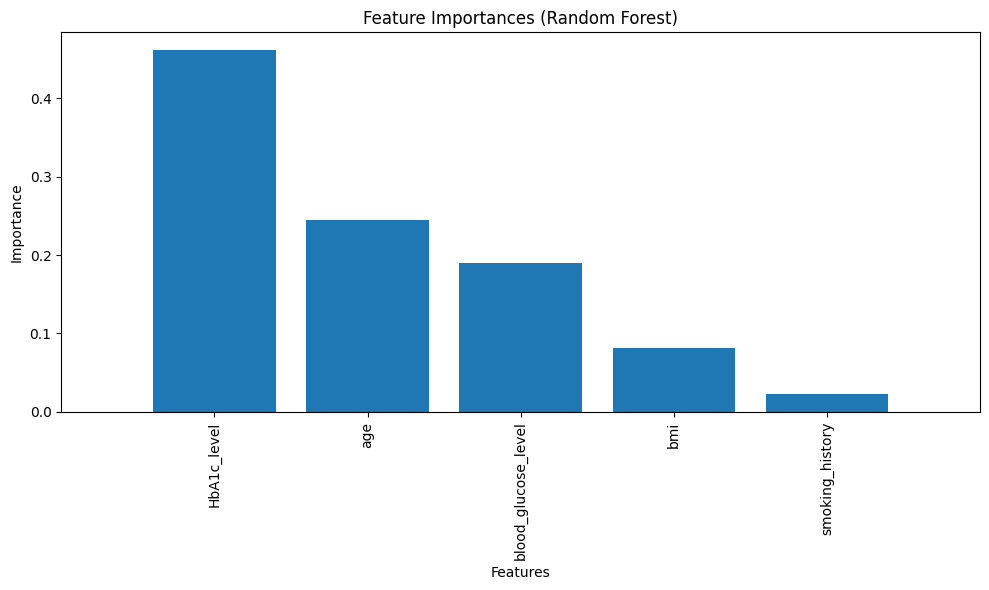

In [50]:
import matplotlib.pyplot as plt

# Fit the Random Forest classifier to the training data
rf_clf.fit(X_train_scaled, oversampled_Y)

# Get feature importances
importances = rf_clf.feature_importances_

# Get feature names
feature_names = X_train_scaled.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Confusion Matrix of Random Forest:
[[16320   399]
 [  400   520]]


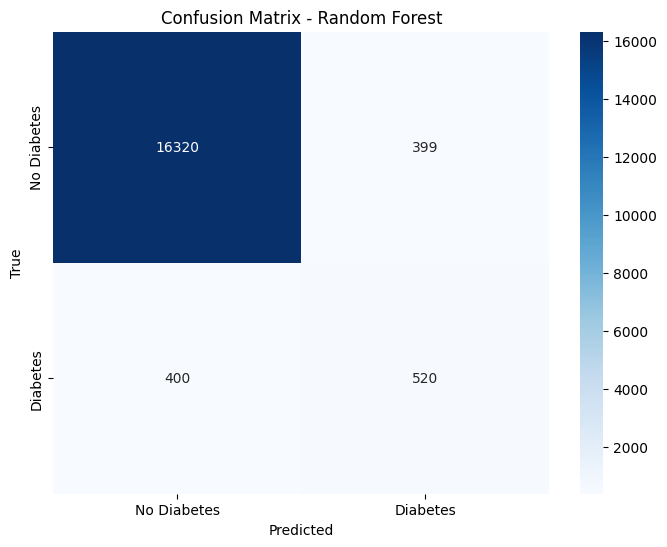

In [51]:
#RFC
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix of Random Forest:")
print(conf_matrix)
plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix - Random Forest')

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

scoring = ['accuracy','precision', 'recall', 'f1', "roc_auc"]

params ={'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 8448,
 'verbose': 0,
 'warm_start': False}
# Create an Extra Trees classifier
extra_trees_model = ExtraTreesClassifier(**params) 

# Perform cross-validation with Extra Trees classifier
extra_trees_score = cross_validate(extra_trees_model, X=X_train_scaled, y=oversampled_Y, cv=10, scoring=scoring, return_train_score=True)
print(extra_trees_score)

# Compute the mean scores
mean_scores = {metric: np.mean(extra_trees_score[f'test_{metric}']) for metric in scoring}

print("Mean Scores:")
for metric, score in mean_scores.items():
    print(f"{metric}: {score:.4f}")
    

{'fit_time': array([4.6027391 , 4.88747191, 5.22239399, 5.56762481, 5.36351633,
       5.39496899, 5.61452174, 5.19063997, 4.70650673, 4.59451222]), 'score_time': array([0.47033644, 0.50146937, 0.50795388, 0.48585677, 0.48657823,
       0.48594189, 0.50195789, 0.47071791, 0.47070909, 0.48635197]), 'test_accuracy': array([0.94473527, 0.98085552, 0.97846246, 0.97973377, 0.98130422,
       0.98078074, 0.98264902, 0.97876   , 0.98055493, 0.98048014]), 'train_accuracy': array([0.9999086 , 0.99891145, 0.99891976, 0.99896131, 0.99889483,
       0.99891976, 0.99895301, 0.99893639, 0.99892808, 0.9989447 ]), 'test_precision': array([0.97431807, 0.97071742, 0.9665986 , 0.96900132, 0.97060544,
       0.97237325, 0.97427605, 0.96702174, 0.96905109, 0.97180203]), 'train_precision': array([0.99983383, 0.99976693, 0.99978358, 0.99981688, 0.99978357,
       0.99981686, 0.9997836 , 0.99976695, 0.99981687, 0.99978359]), 'test_recall': array([0.9135507 , 0.99162429, 0.99117559, 0.99117559, 0.99267125,
   

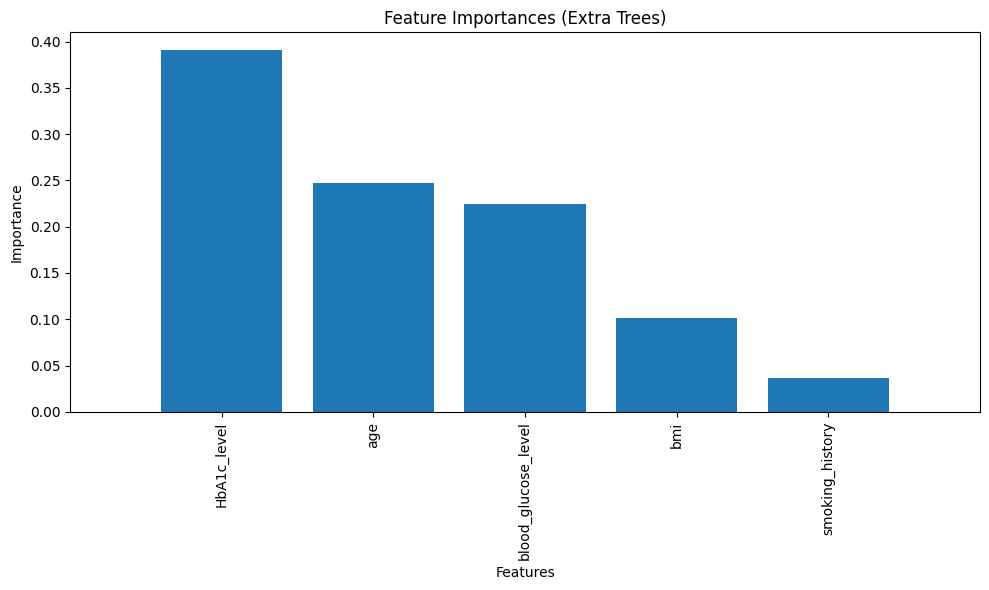

In [53]:
import matplotlib.pyplot as plt

# Fit the Extra Trees classifier to the training data
extra_trees_model.fit(X_train_scaled, oversampled_Y)

# Get feature importances
importances = extra_trees_model.feature_importances_

# Get feature names
feature_names = X_train_scaled.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Extra Trees)")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Confusion Matrix of Extra trees:
[[16135   584]
 [  379   541]]


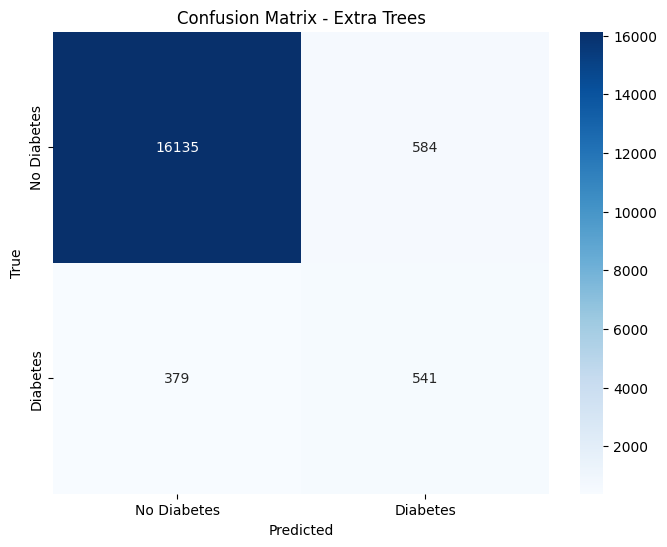

In [54]:
#Extra Trees
conf_matrix = confusion_matrix(y_test, y_pred_extra_trees)

print("Confusion Matrix of Extra trees:")
print(conf_matrix)
plot_confusion_matrix(y_test, y_pred_extra_trees, 'Confusion Matrix - Extra Trees')

In [55]:
import lightgbm as lgb
# Create a LightGBM classifier
params = {'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 8057,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}
lgb_model = lgb.LGBMClassifier(**params)
lgb_score = cross_validate(lgb_model, X=X_train_scaled, y=oversampled_Y, cv=10, scoring=scoring,return_train_score=True)
print(lgb_score)

# Compute the mean scores
mean_scores = {metric: np.mean(lgb_score[f'test_{metric}']) for metric in scoring}

print("Mean Scores:")
for metric, score in mean_scores.items():
    print(f"{metric}: {score:.4f}")

[LightGBM] [Info] Number of positive: 60172, number of negative: 60172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 120344, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 60172, number of negative: 60172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 120344, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 60172, number of negative: 60172
[LightGBM] [Info] Auto-choosing col-wise multi-thread

[LightGBM] [Info] Number of positive: 66858, number of negative: 66858
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 133716, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


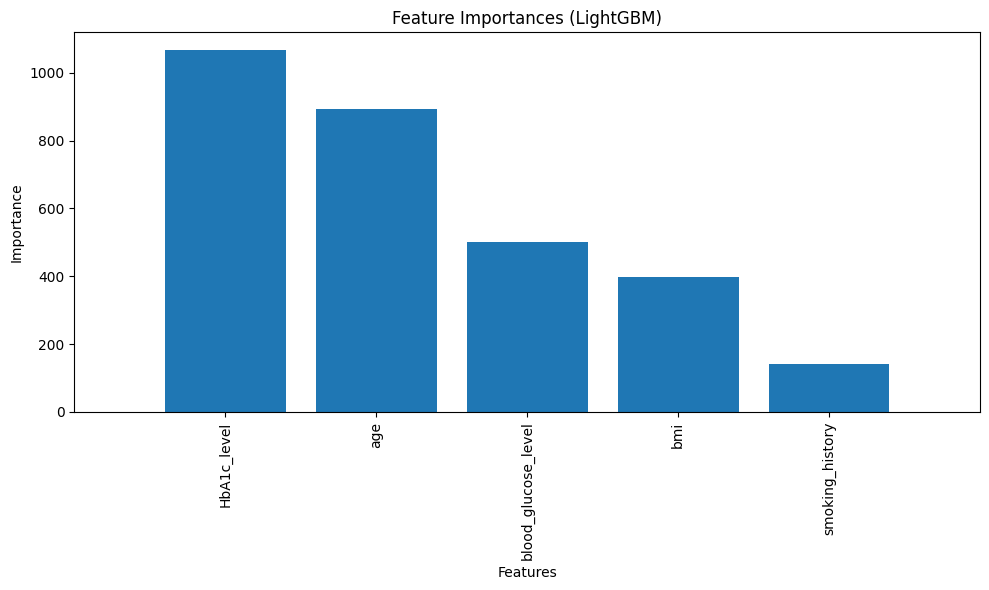

In [56]:
# Fit the LightGBM classifier to the training data
lgb_model.fit(X_train_scaled, oversampled_Y)

# Get feature importances
importances = lgb_model.feature_importances_

# Get feature names
feature_names = X_train_scaled.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (LightGBM)")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Confusion Matrix of Light gradient boosting:
[[16497   222]
 [  423   497]]


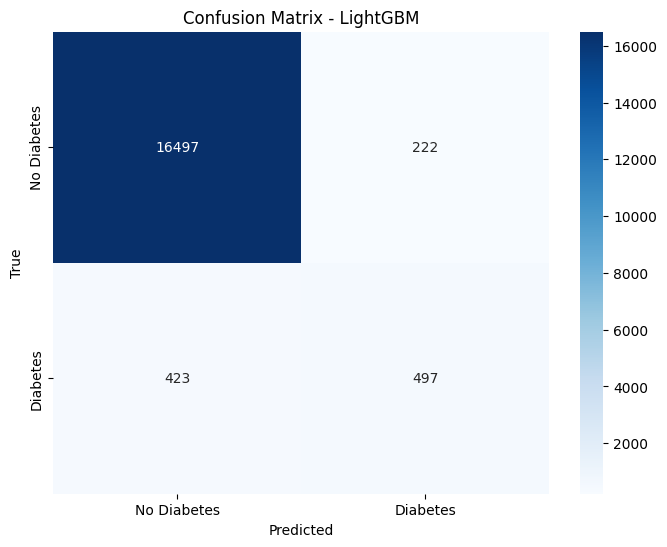

In [57]:
#Light gradient boosting
conf_matrix = confusion_matrix(y_test, y_pred_lgb)

print("Confusion Matrix of Light gradient boosting:")
print(conf_matrix)
plot_confusion_matrix(y_test, y_pred_lgb, 'Confusion Matrix - LightGBM')

In [58]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
params = {'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8057,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
lg_model = LogisticRegression(**params)
lg_score = cross_validate(lg_model, X=X_train_scaled, y=oversampled_Y, cv=10, scoring=scoring,return_train_score=False)
print(lg_score)
# Compute the mean scores
mean_scores = {metric: np.mean(lg_score[f'test_{metric}']) for metric in scoring}

print("Mean Scores:")
for metric, score in mean_scores.items():
    print(f"{metric}: {score:.4f}")

{'fit_time': array([0.13461733, 0.15661049, 0.17925858, 0.18828392, 0.14092255,
       0.16506577, 0.14877439, 0.15701509, 0.1480372 , 0.17577243]), 'score_time': array([0.03128982, 0.03164744, 0.02463603, 0.04686928, 0.01563144,
       0.01962781, 0.01561499, 0.01562238, 0.02464938, 0.02814293]), 'test_accuracy': array([0.85536943, 0.86269818, 0.86157643, 0.86217469, 0.86262339,
       0.8603799 , 0.8673996 , 0.86455762, 0.86268791, 0.86171565]), 'test_precision': array([0.84484761, 0.84722222, 0.84869465, 0.84657221, 0.84720034,
       0.84525004, 0.85277219, 0.84884054, 0.84446023, 0.85157726]), 'test_recall': array([0.87062519, 0.88498355, 0.88004786, 0.88468442, 0.88483398,
       0.88229136, 0.8881077 , 0.88706058, 0.8891714 , 0.87615914]), 'test_f1': array([0.85754272, 0.86569129, 0.86408694, 0.86520881, 0.86560831,
       0.86337358, 0.87008134, 0.86752981, 0.86623925, 0.86369333]), 'test_roc_auc': array([0.93822327, 0.94211685, 0.93906849, 0.94044216, 0.94045704,
       0.9413

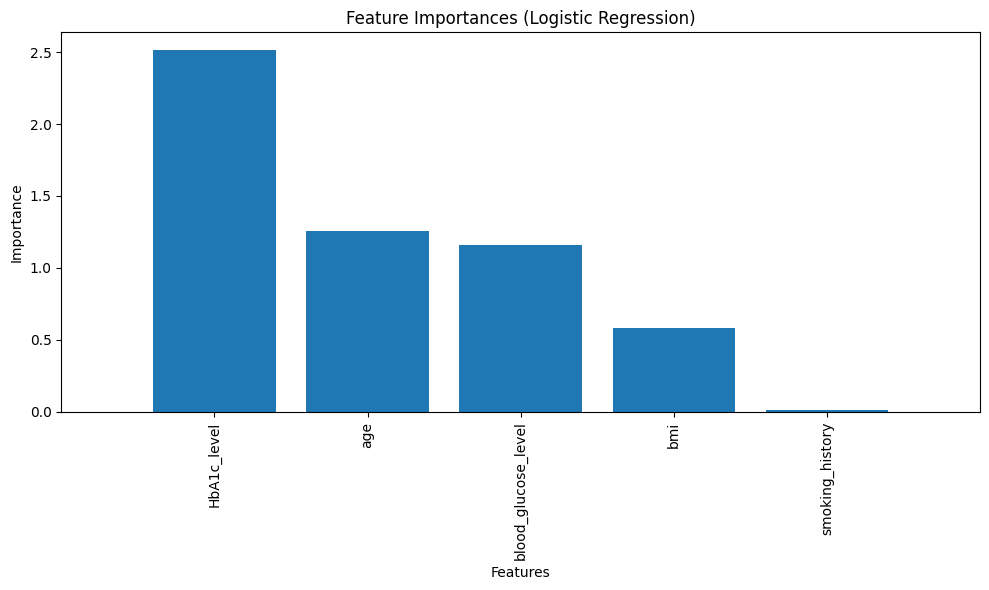

In [59]:
# Fit the Logistic Regression model to the training data
lg_model.fit(X_train_scaled, oversampled_Y)

# Get feature importances
importances = np.abs(lg_model.coef_[0])

# Get feature names
feature_names = X_train_scaled.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Logistic Regression)")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Confusion Matrix of Logistic Regression:
[[14140  2579]
 [  160   760]]


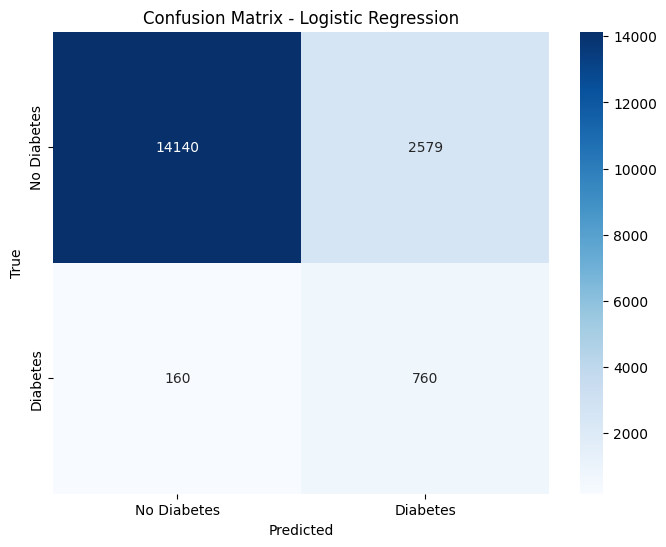

In [60]:
# Logistic regression
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

print("Confusion Matrix of Logistic Regression:")
print(conf_matrix)
plot_confusion_matrix(y_test, y_pred_logistic, 'Confusion Matrix - Logistic Regression')

In [61]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble classifier
ensemble_clf_rf_et = VotingClassifier(estimators=[('rf', rf_clf), ('et', extra_trees_model)], voting='soft')

# Fit the ensemble classifier
ensemble_clf_rf_et.fit(X_train_scaled, oversampled_Y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_features='sqrt',
                                                     n_jobs=-1,
                                                     random_state=1646)),
                             ('et',
                              ExtraTreesClassifier(max_features='sqrt',
                                                   n_jobs=-1,
                                                   random_state=8448))],
                 voting='soft')

In [62]:
# Define the scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform cross-validation with the ensemble classifier
ensemble_clf_rf_et_score = cross_validate(ensemble_clf_rf_et, X=X_train_scaled, y=oversampled_Y, cv=10, scoring=scoring, return_train_score=False)
print(ensemble_clf_rf_et_score)

# Compute the mean scores
mean_scores = {metric: np.mean(ensemble_clf_rf_et_score[f'test_{metric}']) for metric in scoring}

print("Mean Scores:")
for metric, score in mean_scores.items():
    print(f"{metric}: {score:.4f}")

{'fit_time': array([11.72871208, 13.26828408, 12.7977972 , 12.29558873, 11.16237855,
       11.95120001, 10.85250187, 12.29525328, 11.68955326, 12.30270505]), 'score_time': array([0.79996872, 0.92486572, 0.87858534, 0.84672761, 0.9729774 ,
       0.6746006 , 0.67460608, 0.72095847, 0.84675026, 0.70586157]), 'test_accuracy': array([0.92357164, 0.98781035, 0.98653904, 0.98721208, 0.98788513,
       0.9871373 , 0.99027747, 0.9854162 , 0.98698676, 0.98818338]), 'test_precision': array([0.98743546, 0.9801266 , 0.97782021, 0.97953776, 0.98041237,
       0.97953475, 0.98490901, 0.97594603, 0.97798004, 0.98184234]), 'test_recall': array([0.85806162, 0.99581214, 0.99566258, 0.99521388, 0.99566258,
       0.99506431, 0.99581152, 0.99536275, 0.99641041, 0.99476518]), 'test_f1': array([0.91821383, 0.98790711, 0.98666074, 0.9873136 , 0.98797863,
       0.98723846, 0.99033026, 0.98555876, 0.9871092 , 0.98826152]), 'test_roc_auc': array([0.98809883, 0.99937819, 0.99921229, 0.99912857, 0.99930352,
   

Confusion Matrix of RF and et:
[[16382   337]
 [  421   499]]


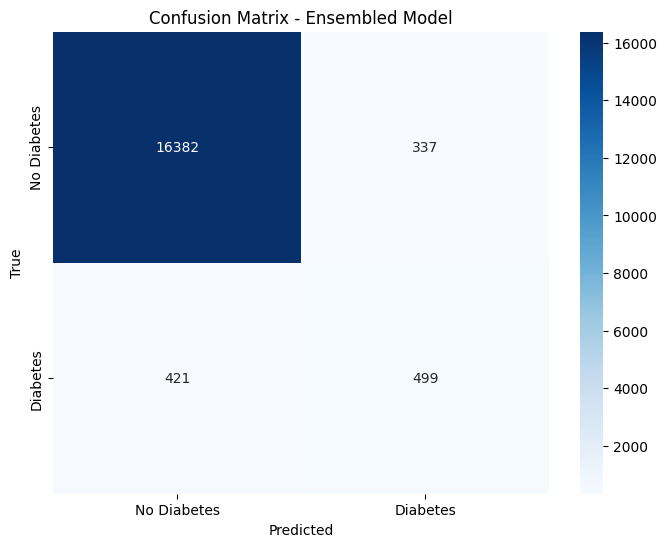

In [63]:
# Ensembled
y_pred_ensemble_rf_et = ensemble_clf_rf_et.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred_ensemble_rf_et)

print("Confusion Matrix of RF and et:")
print(conf_matrix)
plot_confusion_matrix(y_test, y_pred_ensemble_rf_et, 'Confusion Matrix - Ensembled Model')